In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
data=pd.read_csv(r'C:\Users\Divyam Chaturvedi\Desktop\ML_projects\New folder\online_shoppers_intention.csv')

In [3]:
data.shape

(12330, 18)

In [4]:
missing=data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
from sklearn.cluster import KMeans

In [8]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn

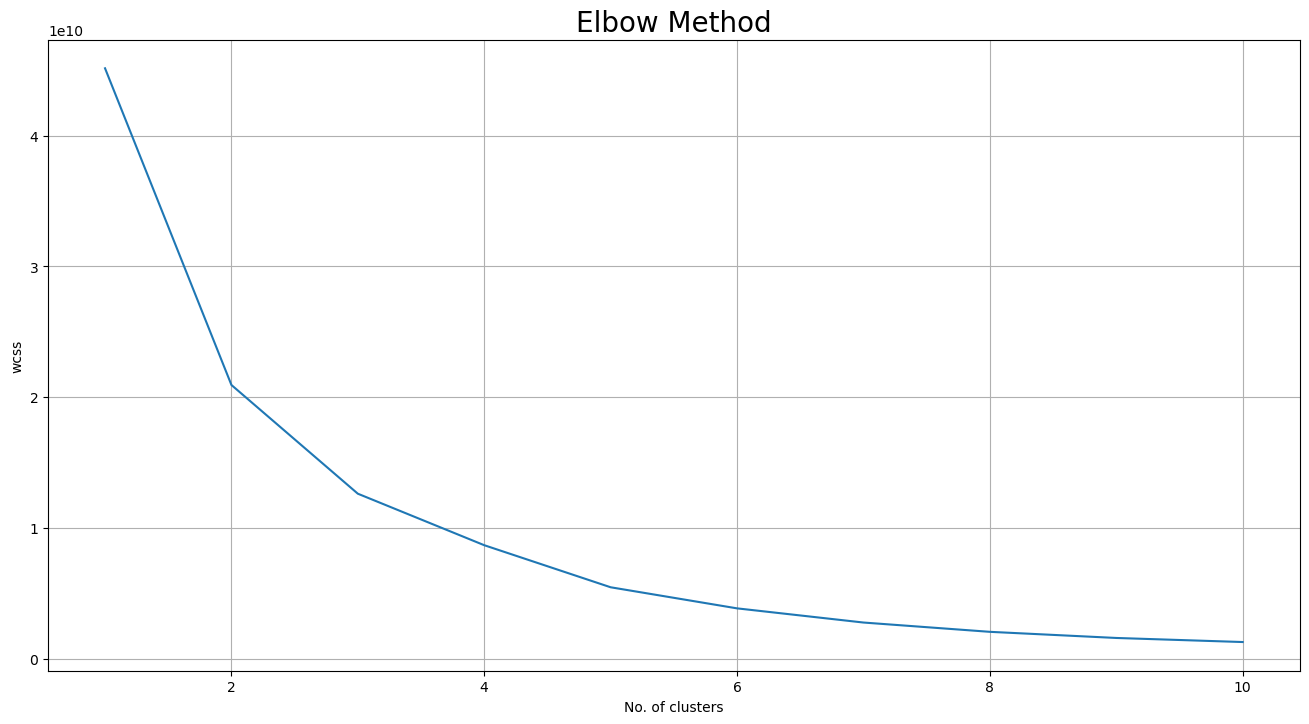

In [9]:
wcss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             max_iter=300,
             n_init=10,
             random_state=0,
             algorithm='full',
             tol=0.001)
    km.fit(x)
    labels=km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize']=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('Elbow Method',fontsize=20)
plt.xlabel("No. of clusters")
plt.ylabel('wcss')
plt.show()

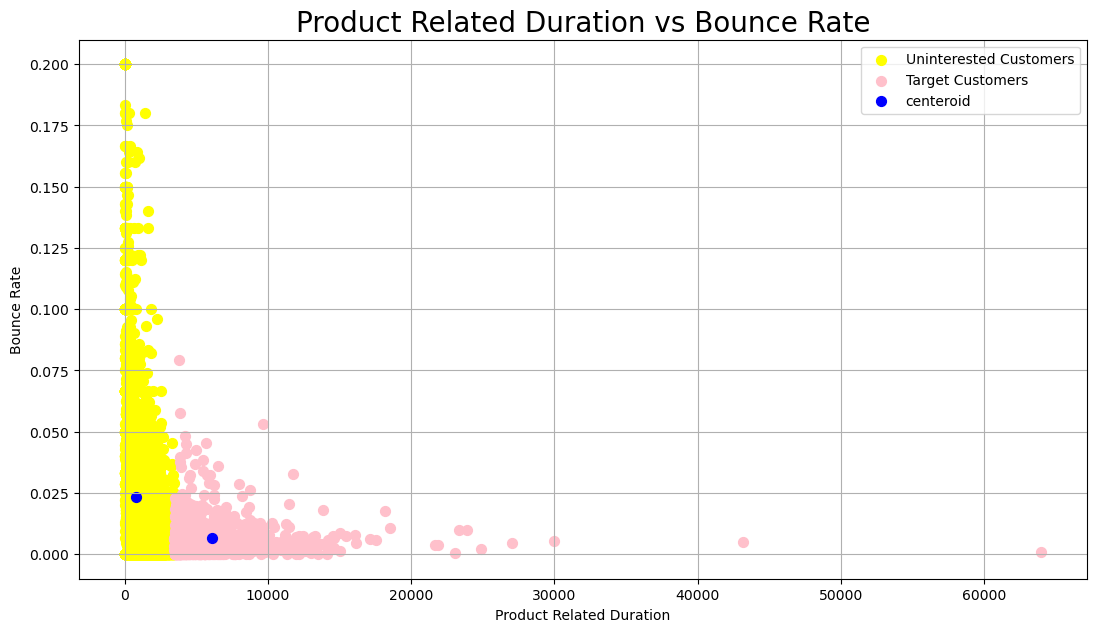

In [13]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uninterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title("Product Related Duration vs Bounce Rate",fontsize=20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rate')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels_true=le.fit_transform(data['Revenue'])
labels_pred=y_means

In [18]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Defaulting to user installation because normal site-packages is not writeable


Adjusted rand index: 
0.08359442469281096


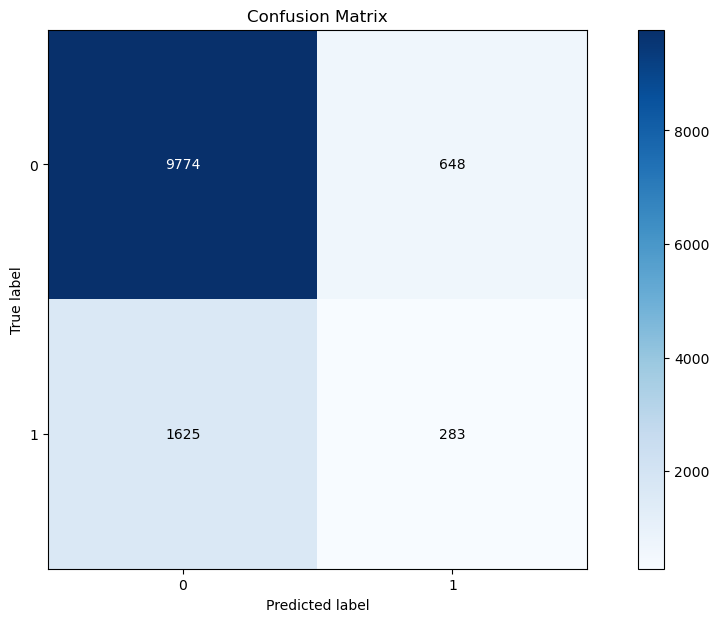

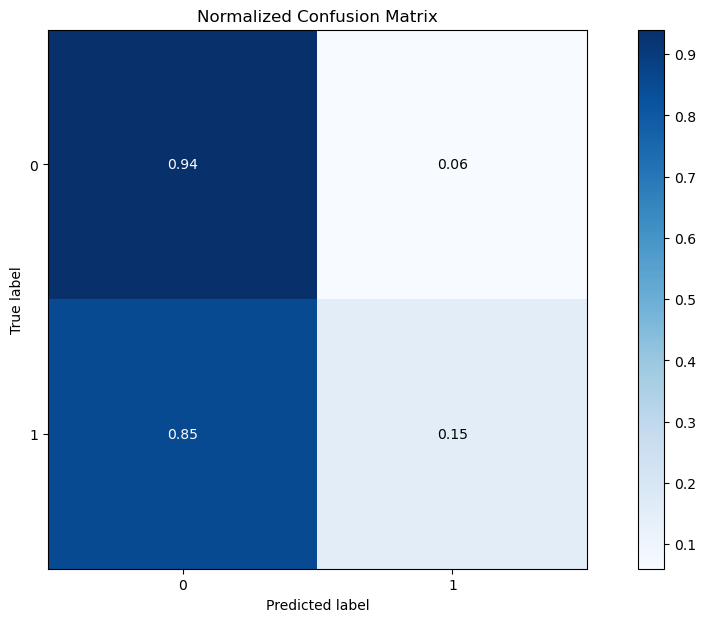

In [19]:
from sklearn import metrics
score=metrics.adjusted_rand_score(labels_true,labels_pred)
print("Adjusted rand index: ")
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)